## Customer Churn

#### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because **keeping an existing customer is far less expensive than acquiring a new customer.** New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

#### Objective:

Examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# importing necessary libraries for eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file
df = pd.read_csv('Telecom_customer_churn.csv')

In [3]:
# viewing randomly 10 entries in the dataset
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2386,1247-QBVSH,Female,0,Yes,Yes,43,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,50.20,2169.4,No
6892,1545-ACTAS,Female,0,Yes,Yes,48,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),99.70,4977.2,No
6996,4174-LPGTI,Female,0,Yes,Yes,41,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),66.50,2728.6,Yes
4772,5795-BKOYE,Female,0,Yes,Yes,69,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),59.10,4134.7,No
6599,0023-XUOPT,Female,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,94.10,1215.6,Yes
2377,9308-ANMVE,Male,0,No,Yes,47,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,55.30,2654.05,No
770,7706-DZNKK,Male,0,No,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.45,237.3,No
3329,5366-OBVMR,Female,0,Yes,No,18,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75,No
5818,3197-NNYNB,Male,0,No,No,65,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),105.10,6631.85,No
3786,0064-YIJGF,Male,0,Yes,Yes,27,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.75,1929,No


In [4]:
# checking the shape of the dataset
df.shape

(7043, 21)

#### We have 7043 enteries in the dataset with 21 columns.

In [5]:
# checking the basic column related information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### TotalCharges is being shown as object datatype but we know it should be float. Treating that below.

#### We can see that there seems to be no null values in our dataset. Let's verify this but after converting the data type for TotalCharges to numerical.

In [6]:
# using describe function to describe the numerical values in the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# using the describe function to describe the object values in the dataset
df.describe(include = ['object'] )

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


#### From the above table we can see that column "TotalCharges" is shown as object but in actual it should be a numerical data. Also, we can see that there are empty enteries in it. So, we will need to first convert it into numerical data then need to treat null values appropriately.

In [8]:
# converting column "TotaclCharges" to numeric then checking the nulls
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now, we can see that there are 11 null values in column "TotalCharges".

Now, let's check the other columns for these null values.

In [9]:
# checking the row enteries for TotalCharges with null values
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


From the above data we can see that column "Tenure" has all 0 as entries and column "Contract" has (10 - Two year and 1 - One year) as enteries for the null values in TotalCharges.

For column "MonthlyCharges" we have different billing values.

Thus, we can infer that these are new customers who have been for less than a month avaialing services with the company.

So, we would need to fill missing values in TotalCharges based on MonthlyCharges as when their 1 month gets completed they will get TotalCharges = MonthlyCharges.

In [10]:
# filling the null values in TotalCharges witht MonthlyCharges as the tenure is less than 1.
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

In [11]:
# Checking the nulls
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Now, we have no null values in the dataset.

#### So, let's see some trends in our dataset.

In [12]:
# using describe function to describe the numerical values in the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# using the describe function to describe the object values in the dataset
df.describe(include = ['object'] )

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [14]:
# First let's drop customerID as it's not related to churn in any way.
df.drop('customerID', axis = 1, inplace=True)

### Data Visualization for key insights

In [15]:
# getting the columns in the dataframe
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
# importing pandasql for data manipulation
from pandasql import sqldf

### Column - Gender

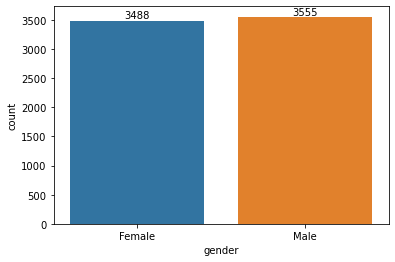

In [17]:
# plotting graph for gender count
a = sns.countplot(x = 'gender', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### The distribution of male and female categories is approx. equal. Male have higher count if we look exact values.

##### Now Let's see how is the churning within each category of the Gender.

In [18]:
# Selecting the required columns for visualization
df1 = df[['gender', 'Churn']]

In [19]:
# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY gender, churn';
df_temp = sqldf(q)

In [20]:
df_temp

,gender,Churn,Value_Counts
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


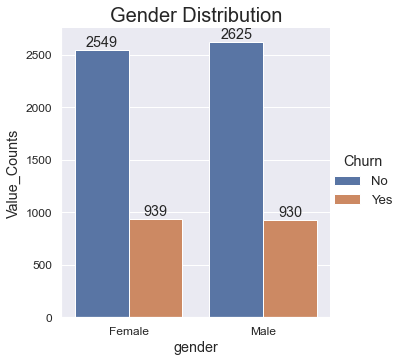

In [21]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'gender', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Gender Distribution', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### From the above graph we can see that females have churned more than males if we look at exact values. While it is almost equal in both categories.

### Column - Senior Citizen

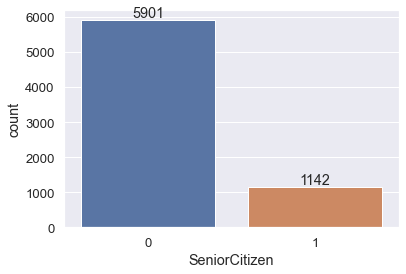

In [22]:
# plotting graph for SeniorCitizen count
a = sns.countplot(x = 'SeniorCitizen', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Client base seems to be highly comprising of Young Citizen.

##### Now Let's see how is the churning within each category of the Senior Citizen.

In [23]:
# Selecting the required columns for visualization
df1 = df[['SeniorCitizen', 'Churn']]

In [24]:
# finding the value counts for each category that churned or not
df1["SeniorCitizen"]= df1["SeniorCitizen"].map({0: "No", 1: "Yes"})

q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY SeniorCitizen, churn';
df_temp = sqldf(q)

df_temp

,SeniorCitizen,Churn,Value_Counts
0,No,No,4508
1,No,Yes,1393
2,Yes,No,666
3,Yes,Yes,476


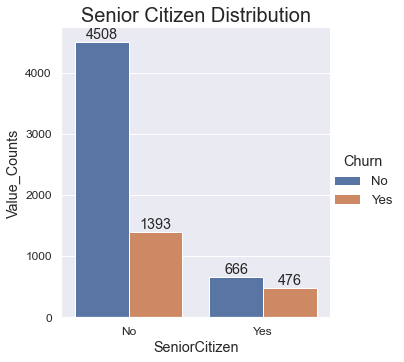

In [25]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'SeniorCitizen', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Senior Citizen Distribution', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Senior Citizens have churned more if we talk about proportions in each category - Senior or Young. And, according to exact values Young Citizens have churned more since their value count is very high.

### Column - Partner

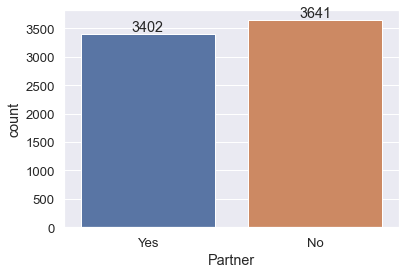

In [26]:
# plotting graph for Partner count
a = sns.countplot(x = 'Partner', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Customers who have partner are less than the customers who are without partners.

##### Now Let's see how is the churning within each category of the Partner.

In [27]:
# Selecting the required columns for visualization
df1 = df[['Partner', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY Partner, churn';
df_temp = sqldf(q)

df_temp

,Partner,Churn,Value_Counts
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


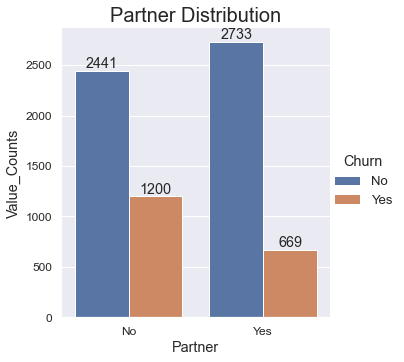

In [28]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'Partner', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Partner Distribution', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Customers who do not have partner have churned more than the customers who have partner.

### Column - Dependents

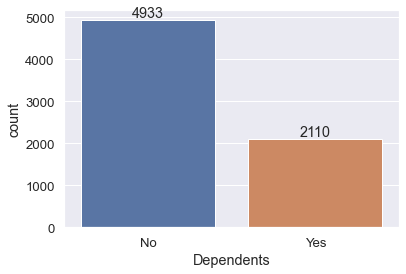

In [29]:
# plotting graph for Dependents count
a = sns.countplot(x = 'Dependents', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Customer who are Independents comprises of almost twice of the number of dependent customers.

##### Now Let's see how is the churning within each category of the Dependents.

In [30]:
# Selecting the required columns for visualization
df1 = df[['Dependents', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY Dependents, churn';
df_temp = sqldf(q)

df_temp

,Dependents,Churn,Value_Counts
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


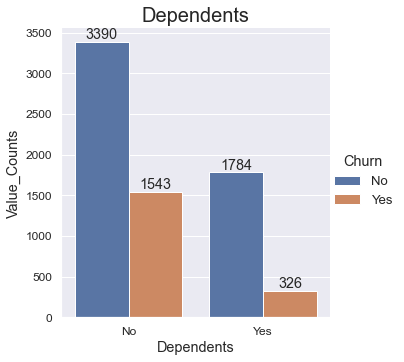

In [31]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'Dependents', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Dependents', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Customers who are independents have churned more than the customers who are dependents.

### Column - Phone Services

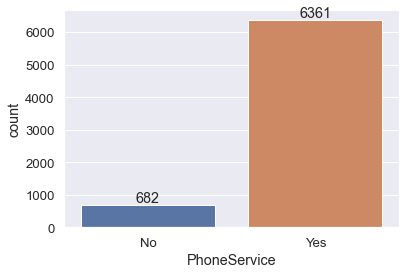

In [32]:
# plotting graph for PhoneServices count
a = sns.countplot(x = 'PhoneService', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Almost 90% of customers have opted for Phone Services. 

##### Now Let's see how is the churning within each category of the Phone Services.

In [33]:
# Selecting the required columns for visualization
df1 = df[['PhoneService', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY PhoneService, churn';
df_temp = sqldf(q)

df_temp

,PhoneService,Churn,Value_Counts
0,No,No,512
1,No,Yes,170
2,Yes,No,4662
3,Yes,Yes,1699


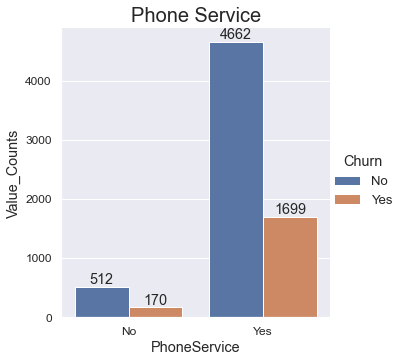

In [34]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'PhoneService', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Phone Service', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### The customers who have opted Phone Services have churned more than the customers who have not opted Phone Services.

### Column - Multiple Lines

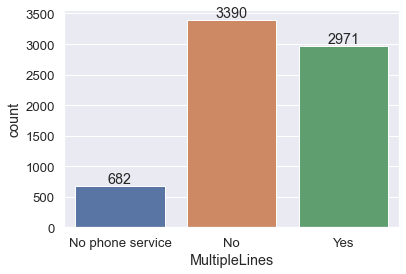

In [35]:
# plotting graph for MultipleLines count
a = sns.countplot(x = 'MultipleLines', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### For Multiple Lines to be active, customer should have opted for Phone Services first. Among Customers who have opted Phone Services, mostly customers have not opted for Multiple Lines. But the customers who have opted for Multiple Lines are not so far behind.

##### Now Let's see how is the churning within each category of the Multiple Lines.

In [36]:
# Selecting the required columns for visualization
df1 = df[['MultipleLines', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY MultipleLines, churn';
df_temp = sqldf(q)

df_temp

,MultipleLines,Churn,Value_Counts
0,No,No,2541
1,No,Yes,849
2,No phone service,No,512
3,No phone service,Yes,170
4,Yes,No,2121
5,Yes,Yes,850


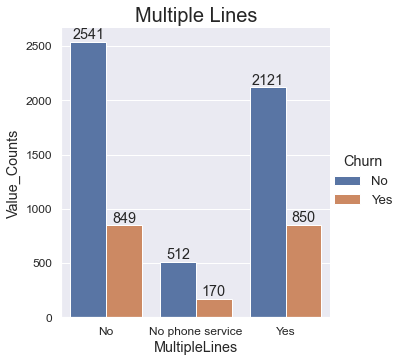

In [37]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'MultipleLines', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Multiple Lines', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Although Churning for customers with multiple lines seems to be equal for customers with or without multiple lines but proportionally we can see that customers who have Multi Lines have churned more.

### Column - Internet Services

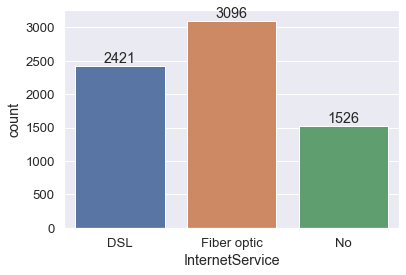

In [38]:
# plotting graph for Internet Services count
a = sns.countplot(x = 'InternetService', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Most of the customers have opted for Fiber Optic Internet Services followed by DSL services.

##### Now Let's see how is the churning within each category of the Internet Services.

In [39]:
# Selecting the required columns for visualization
df1 = df[['InternetService', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY InternetService, churn';
df_temp = sqldf(q)

df_temp

,InternetService,Churn,Value_Counts
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


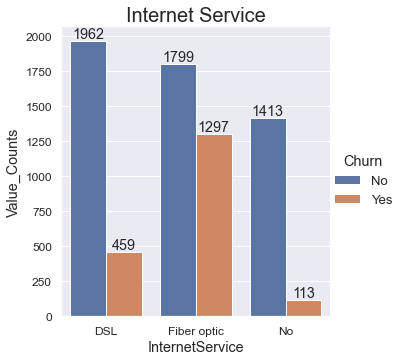

In [40]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'InternetService', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Internet Service', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Customers who opted for Fiber Optic Internet Service have churned most.

### Column - Online Security

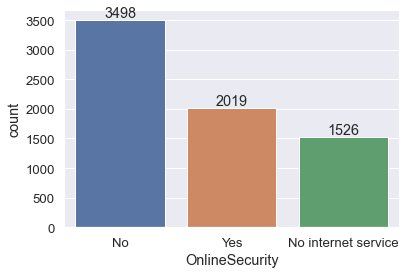

In [41]:
# plotting graph for OnlineSecurity count
a = sns.countplot(x = 'OnlineSecurity', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Most of the customers do not have service access to OnlineSecurity who have opted for Internet Services.

##### Now Let's see how is the churning within each category of the Online Security.

In [42]:
# Selecting the required columns for visualization
df1 = df[['OnlineSecurity', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY OnlineSecurity, churn';
df_temp = sqldf(q)

df_temp

,OnlineSecurity,Churn,Value_Counts
0,No,No,2037
1,No,Yes,1461
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1724
5,Yes,Yes,295


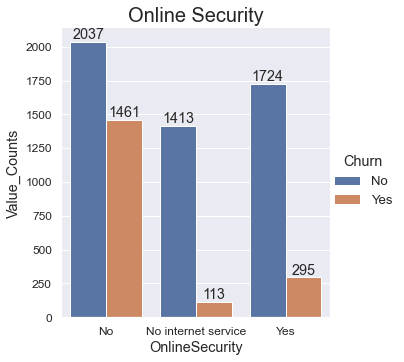

In [43]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'OnlineSecurity', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Online Security', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Among the customers who have active Internet Services large customers have churned who did not have Online Security. Customers without Internet Services and without Online Security have churned the least.

### Column - Online Backup

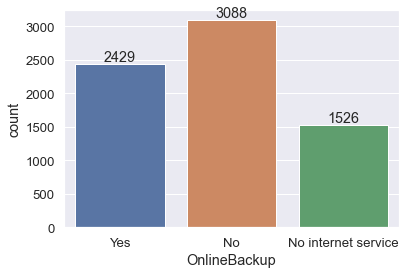

In [44]:
# plotting graph for OnlinBackup count
a = sns.countplot(x = 'OnlineBackup', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Among the customers who have opted for Internet Services, customers who do not have service access to Online Backup are greater in numbers compared to customers with Online Backup .

##### Now Let's see how is the churning within each category of the Online Backup.

In [45]:
# Selecting the required columns for visualization
df1 = df[['OnlineBackup', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY OnlineBackup, churn';
df_temp = sqldf(q)

df_temp

,OnlineBackup,Churn,Value_Counts
0,No,No,1855
1,No,Yes,1233
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1906
5,Yes,Yes,523


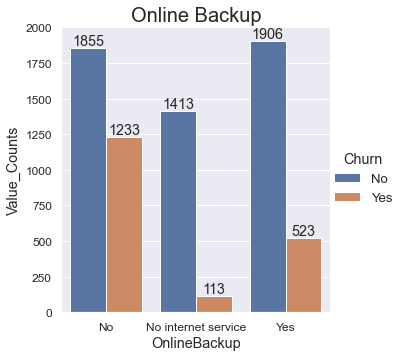

In [46]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'OnlineBackup', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Online Backup', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Among the customers who have active Internet Services significant amount of customers have churned who did not have Online Backup. Customers without Internet Services and without Online Backup have churned the least.

### Column - Device Protection

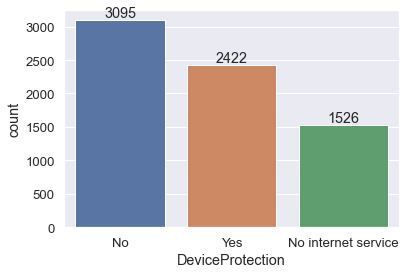

In [47]:
# plotting graph for DeviceProtection count
a = sns.countplot(x = 'DeviceProtection', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Most of the customers do not have service access to Device Protection who have opted for Internet Services.

##### Now Let's see how is the churning within each category of the Device Protection.

In [48]:
# Selecting the required columns for visualization
df1 = df[['DeviceProtection', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY DeviceProtection, churn';
df_temp = sqldf(q)

df_temp

,DeviceProtection,Churn,Value_Counts
0,No,No,1884
1,No,Yes,1211
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1877
5,Yes,Yes,545


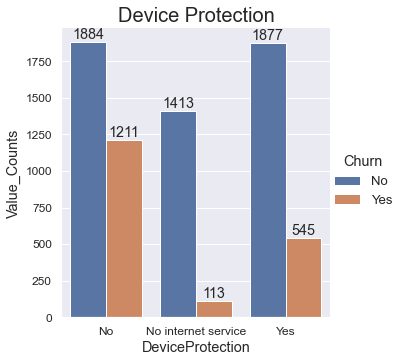

In [49]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'DeviceProtection', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Device Protection', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Among the customers who have active Internet Services significant amount of customers have churned who did not have Device Protection. Customers without Internet Services and without Device Protection have churned the least.

### Column - Tech Support

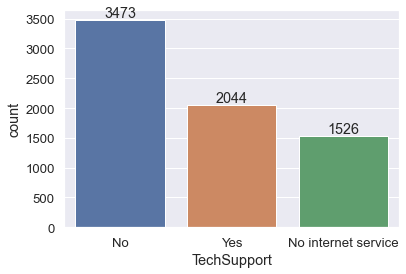

In [50]:
# plotting graph for TechSupport count
a = sns.countplot(x = 'TechSupport', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Most of the customers do not have service access to Tech Support who have opted for Internet Services.

##### Now Let's see how is the churning within each category of the Tech Support.

In [51]:
# Selecting the required columns for visualization
df1 = df[['TechSupport', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY TechSupport, churn';
df_temp = sqldf(q)

df_temp

,TechSupport,Churn,Value_Counts
0,No,No,2027
1,No,Yes,1446
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1734
5,Yes,Yes,310


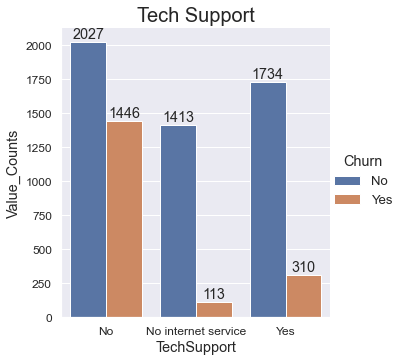

In [52]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'TechSupport', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Tech Support', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Among the customers who have active Internet Services large customers have churned who did not have Tech Support.

### Column - StreamingTV

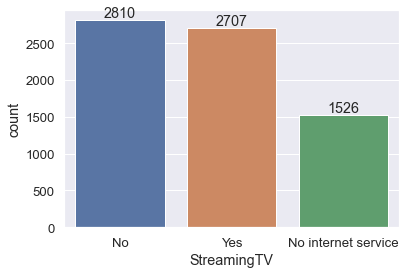

In [53]:
# plotting graph for StreamingTV count
a = sns.countplot(x = 'StreamingTV', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Customers are approx equally distributed for Streaming TV service among the customers who have opted for Internet Services. But if we consider actual number then we can say that the cutomers without Streaming TV services are more.

##### Now Let's see how is the churning within each category of the Streaming TV.

In [54]:
# Selecting the required columns for visualization
df1 = df[['StreamingTV', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY StreamingTV, churn';
df_temp = sqldf(q)

df_temp

,StreamingTV,Churn,Value_Counts
0,No,No,1868
1,No,Yes,942
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1893
5,Yes,Yes,814


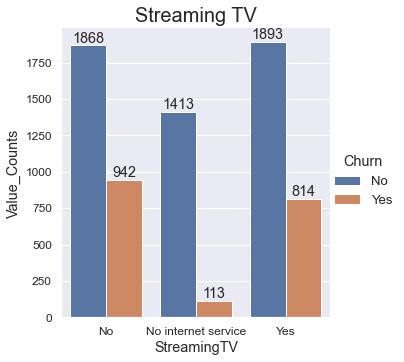

In [55]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'StreamingTV', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Streaming TV', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Among the customers who have active Internet Services, although the customers without Streaming TV services churned more but the difference for the churned customers with or without Streaming TV service is not so high. Customers without Internet Services and without Online Security have churned the least.

### Column - Streaming Movies

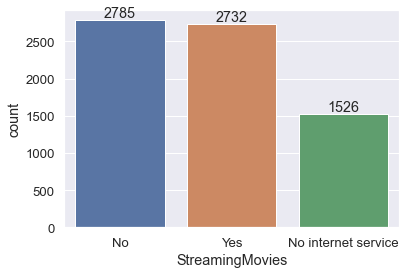

In [56]:
# plotting graph for StreamingMovies count
a = sns.countplot(x = 'StreamingMovies', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Customers are almost equally distributed for Streaming Movies service among the customers who have opted for Internet Services. But if we consider actual number then we can say that the cutomers without Streaming Movies service are more.

##### Now Let's see how is the churning within each category of the Streaming Movies.

In [57]:
# Selecting the required columns for visualization
df1 = df[['StreamingMovies', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY StreamingMovies, churn';
df_temp = sqldf(q)

df_temp

,StreamingMovies,Churn,Value_Counts
0,No,No,1847
1,No,Yes,938
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1914
5,Yes,Yes,818


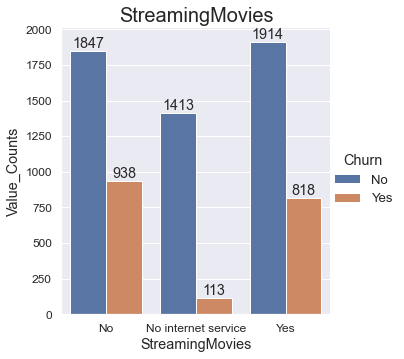

In [58]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'StreamingMovies', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('StreamingMovies', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Among the customers who have active Internet Services, although the customers without Streaming Movies service churned more but the difference for the churned customers with and without Streaming TV service is not so high. Customers without Internet Services and without Online Security have churned the least.

### Column - Contract

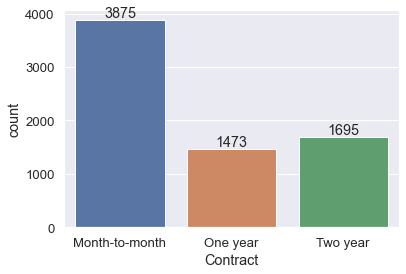

In [59]:
# plotting graph for Contract count
a = sns.countplot(x = 'Contract', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### Most of the customers have opted for month-to-month Contract followed by Two Year contract with a large gap and  then One Year contract with small gap. 

##### Now Let's see how is the churning within each category of the Contract.

In [60]:
# Selecting the required columns for visualization
df1 = df[['Contract', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY Contract, churn';
df_temp = sqldf(q)

df_temp

,Contract,Churn,Value_Counts
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


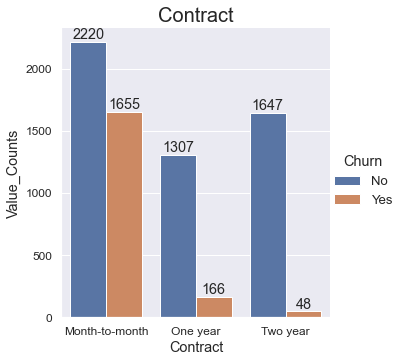

In [61]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'Contract', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('Contract', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Very high number of customers churned who had month-to-month contract. Least number of customers churned who have Two year contract.

### Column - Paperless Billing

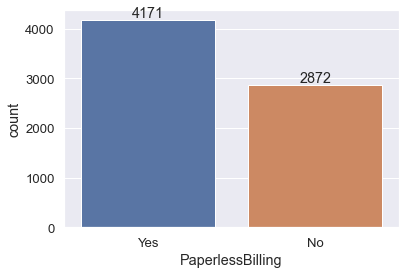

In [62]:
# plotting graph for PaperlessBilling count
a = sns.countplot(x = 'PaperlessBilling', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')

#### More number of customers have Paperless Billing.

##### Now Let's see how is the churning within each category of the Paperless Billing.

In [63]:
# Selecting the required columns for visualization
df1 = df[['PaperlessBilling', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY PaperlessBilling, churn';
df_temp = sqldf(q)

df_temp

,PaperlessBilling,Churn,Value_Counts
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


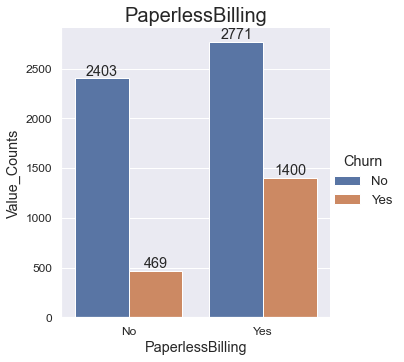

In [64]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'PaperlessBilling', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('PaperlessBilling', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Most number of customers have churned who had Paperless Billing.

### Column - Payment Method

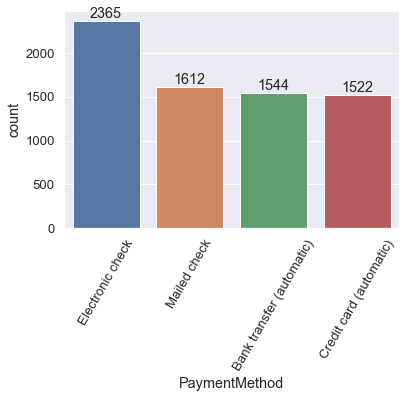

In [65]:
# plotting graph for Payment count
a = sns.countplot(x = 'PaymentMethod', data = df)
for c in a.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation = 60)
plt.show()

#### Most of the customers pay through Electronic Check followed by Mailed Check. Customers payment through Bank Transfer (automatic) and Credit Card (automatic) are almost equal in number.

##### Now Let's see how is the churning within each category of the Payment Method.

In [66]:
# Selecting the required columns for visualization
df1 = df[['PaymentMethod', 'Churn']]

# finding the value counts for each category that churned or not
q = 'SELECT *, COUNT(*) AS Value_Counts FROM df1 GROUP BY PaymentMethod, churn';
df_temp = sqldf(q)

df_temp

,PaymentMethod,Churn,Value_Counts
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


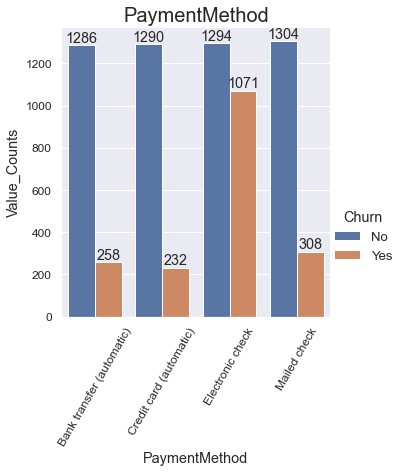

In [67]:
# plotting the category-wise distribution for each category
sns.set(font_scale = 1.2)
a = sns.catplot(x = 'PaymentMethod', y = 'Value_Counts', data = df_temp, kind = 'bar', hue = 'Churn')
plt.title('PaymentMethod', fontsize=20)
plt.tick_params(labelsize=12)
for c in a.ax.containers:
    labels = [f'{int((v.get_height()))}' for v in c]
    a.ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation = 60)
plt.show()

#### Customer who make payment through Electronic Check churned most with a huge difference. Customers who pay by Credit Card (automatic) churned least.

### Column - Tenure

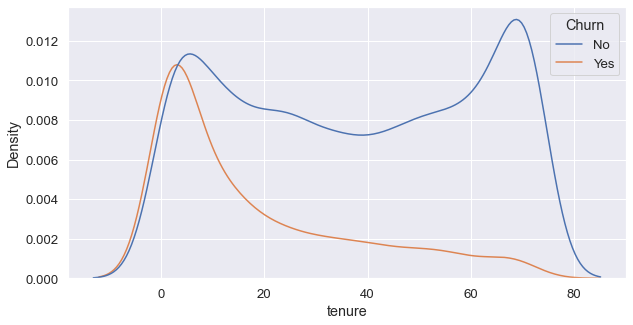

In [68]:
# plotting graph for tenure based on churn - "Yes" or "No"
plt.figure(figsize=(10, 5))
sns.kdeplot(x = 'tenure', data = df, hue = 'Churn')

plt.show()

#### From the above graph we can conclude that customers are more likely to churn within first 5 years then their churing drops significantly at a tenure of 20 years.

### Column - Monthly Charges

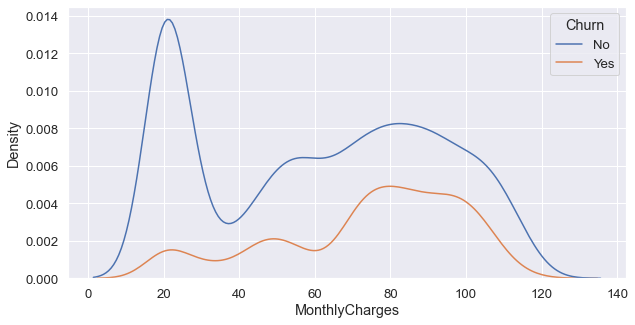

In [69]:
# plotting graph for MonthlyCharges based on churn - "Yes" or "No"
plt.figure(figsize=(10, 5))
sns.kdeplot(x = 'MonthlyCharges', data = df, hue = 'Churn')

plt.show()

#### From the above graph we can conclude that customers have churned most if their monthly charges are on a higher side. This monthly charges range in which customers are likely to churn lies typically from 70 to 105.

### Column - Total Charges

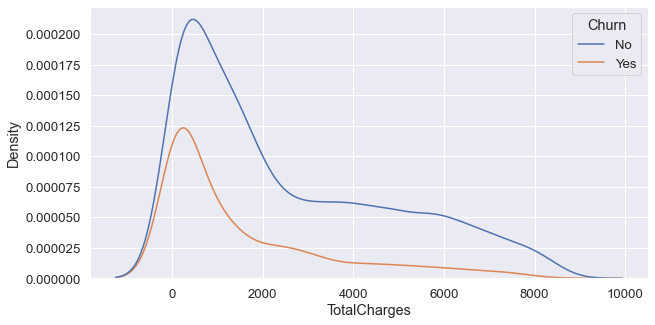

In [70]:
# plotting graph for TotalCharges based on churn - "Yes" or "No"
plt.figure(figsize=(10, 5))
sns.kdeplot(x = 'TotalCharges', data = df, hue = 'Churn')

plt.show()

#### The customers with Total Charges lower than 1500 have churned the most. Churning reduces as the Total Charges for a customer increases.

##### Let's confirm these findings through boxplot as well.

In [71]:
# creating a temporary dataframe to plot boxplot
tem_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

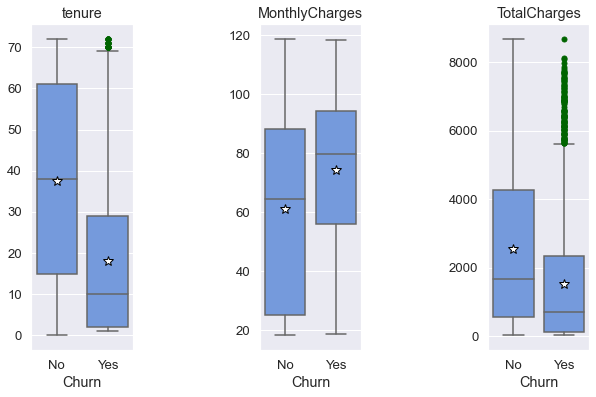

In [72]:
# Determine the number of columns
num_inputs = len(list(tem_df.columns)) - 1

# Create a figure with 1 row, and num_inputs long
fig, axs = plt.subplots(1, num_inputs, figsize=(10,6))

# Use a for loop to loop over each column in the dataframe and 
# create a separate box plot
for i, (ax, curve) in enumerate(zip(axs.flat, list(tem_df.columns))):
    sns.boxplot(x = tem_df['Churn'], y=tem_df[curve], ax=ax, color='cornflowerblue', showmeans=True,  
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           flierprops={'marker':'o', 
                      'markerfacecolor':'darkgreen',
                      'markeredgecolor':'darkgreen'})
    
    ax.set_title(list(tem_df.columns)[i])
    ax.set_ylabel('')
    
plt.subplots_adjust(hspace=0.15, wspace=1.25)
plt.show()

##### From the boxplot we can clearly see that Customers churned when the MonthlyCharges were high, when the tenure was short. TotalCharges is dependent on the tenure and monthlyCharges. So, we can say that for a longer tenure the TotalCharges would also be higher.

## Data Preprocessing

In [73]:
# Separating categorical columns from numerical
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = list(set(df.columns) - set(num_col))

In [74]:
# importing the encoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [75]:
# encoding the categorical columns
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [76]:
# Checking the dataframe
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


### Correlation Heatmap

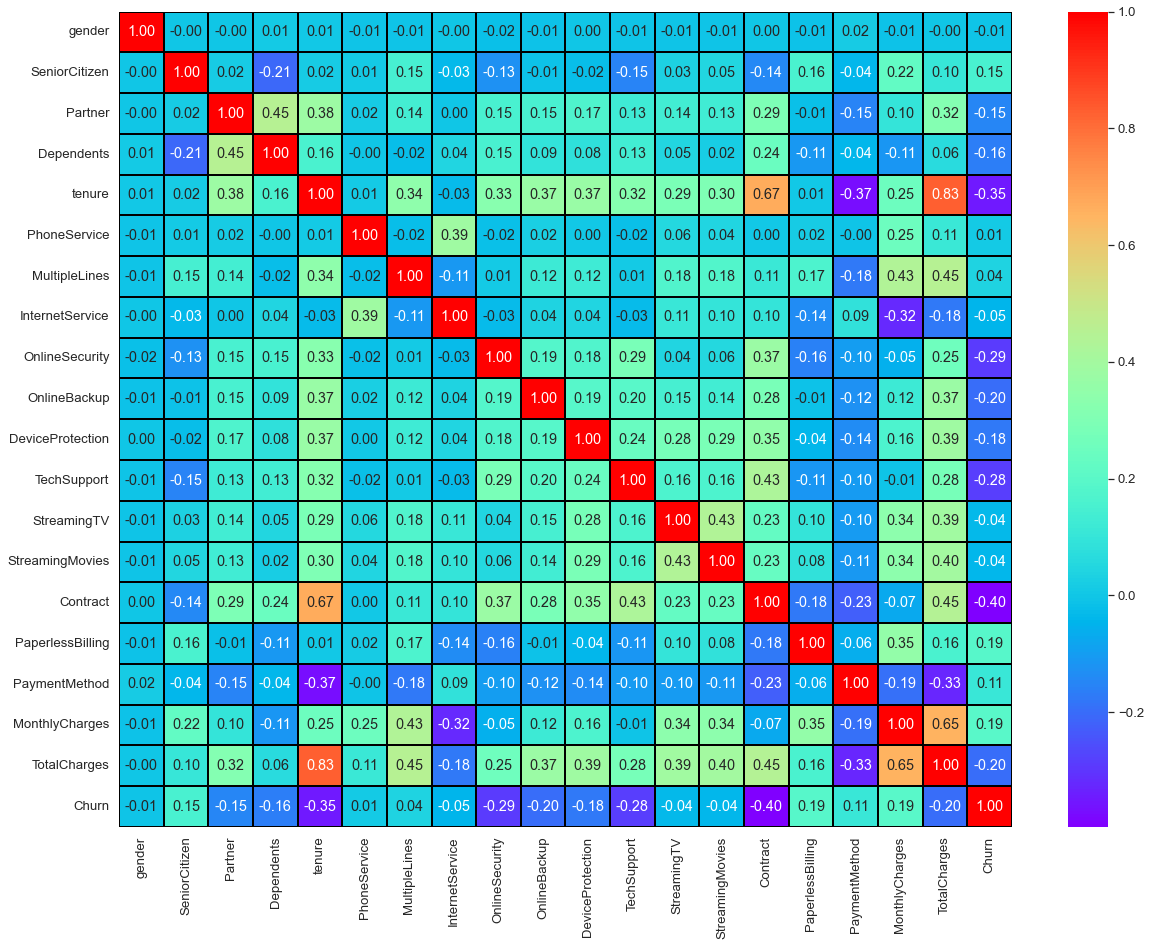

In [77]:
# plotting the correlation heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, linewidths = 0.1, linecolor = 'black', fmt = '0.2f', cmap = 'rainbow')
plt.show()

* __TotalCharges has very high correlation with tenure and high correlation with MonthlyCharges.__
* __Contract has high correlation with tenure.__

### Correlation with the target variable

In [78]:
# finding correlation with the target variable "Churn" and excluding "Churn" column in result
df.corr()['Churn'].sort_values()[:-1]

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.198347
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Name: Churn, dtype: float64

#### Visualizing the negative and positive related columns.

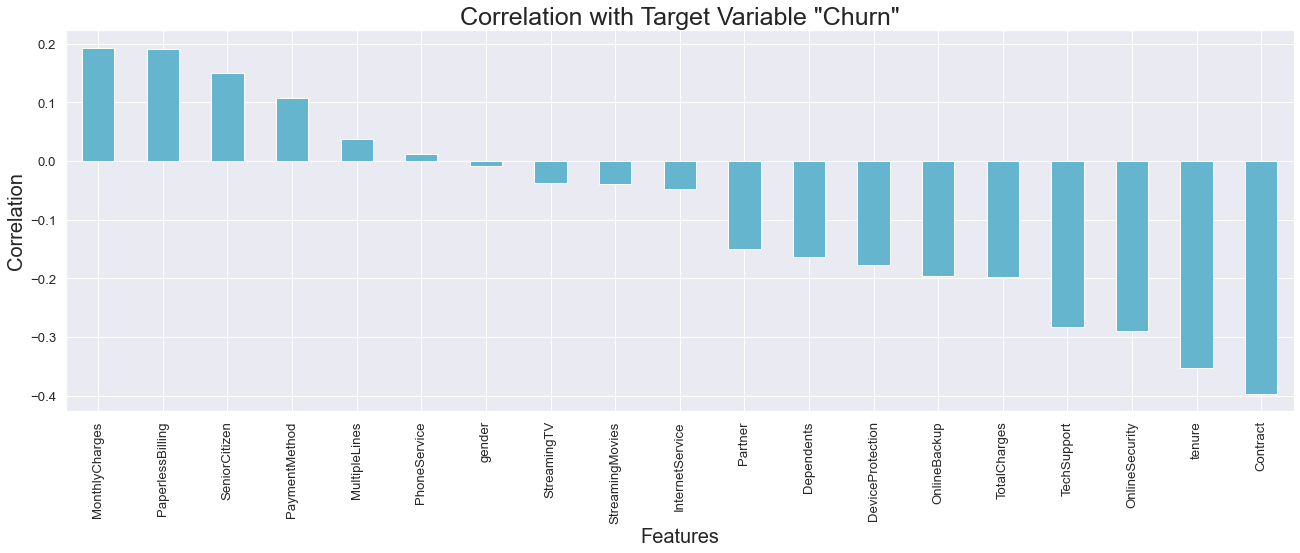

In [79]:
# visualizing the correlations using bar plot
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar', color = 'c')
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Correlation with Target Variable "Churn"',fontsize=25)
plt.show()

### Checking for the Skewness

In [80]:
# checking the skewness in the data
skewness = pd.DataFrame(df.skew(),columns=['skewness'])

#### Keeping the range of (0.5, -0.5) as optimal range for skeness range.

In [81]:
# Selecting the columns outside skewness range.
skewness[(skewness['skewness'] > 0.5) | (skewness['skewness'] < -0.5)]

,skewness
SeniorCitizen,1.833633
Dependents,0.875199
PhoneService,-2.727153
Contract,0.630959
TotalCharges,0.963316
Churn,1.063031


#### Since the columns "Senior Citizen, Dependents, Phone Service, Contract" are Categorical Columns. Therefore, no need for removing skewness.

#### Column "Churn" is a target variable so for it also skewness removal not required.

#### Column "Total Charges" is the only column for which we would remove skewness.

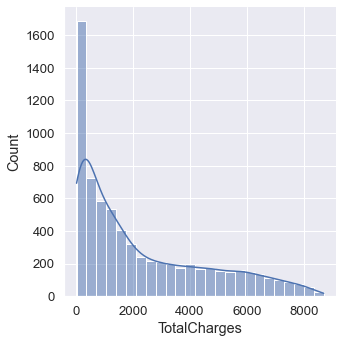

In [82]:
# checking the plot
sns.displot(df['TotalCharges'], kde = True)

### Checking Log Transformation

In [83]:
# removing the skewness using log transformation
df1['TotalCharges'] = np.log(df['TotalCharges'])

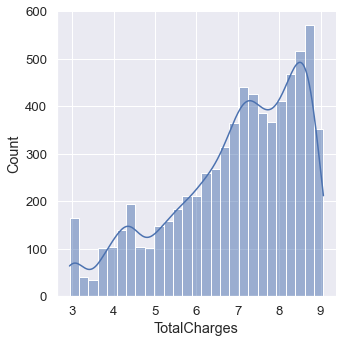

In [84]:
# checking the skewness in plot
sns.displot(df1['TotalCharges'], kde = True)

In [85]:
# checking the skewness
skewness = pd.DataFrame(df1.skew(),columns=['skewness'])

skewness.loc["TotalCharges"]

skewness   -0.752664
Name: TotalCharges, dtype: float64

#### From the graph and skew value we can see this did not work. So, let's try Square root transformation.

In [86]:
# removing the skewness using square root transformation
df1['TotalCharges'] = np.sqrt(df['TotalCharges'])

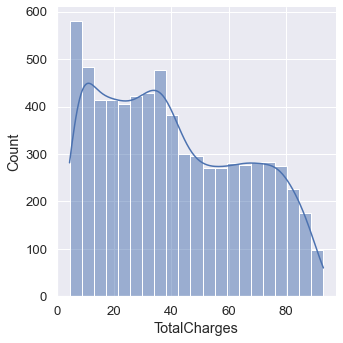

In [87]:
# checking the skewness in plot
sns.displot(df1['TotalCharges'], kde = True)

In [88]:
# checking the skewness
skewness = pd.DataFrame(df1.skew(),columns=['skewness'])

skewness.loc["TotalCharges"]

skewness    0.309874
Name: TotalCharges, dtype: float64

#### From the graph and skew value, we can see that skewness is within permissible range. We try Box Cox transformation as well to see how it affects the data.

In [89]:
# importing necessary library
from scipy import stats

In [90]:
# removing the skewness using Box-Cox transformation
df1['TotalCharges'] = stats.boxcox(df['TotalCharges'])[0]

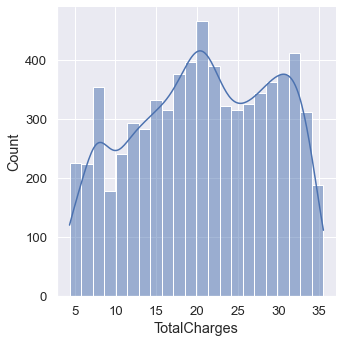

In [91]:
# checking the skewness in plot
sns.displot(df1['TotalCharges'], kde = True)

In [92]:
# checking the skewness
skewness = pd.DataFrame(df1.skew(),columns=['skewness'])

skewness.loc["TotalCharges"]

skewness   -0.146201
Name: TotalCharges, dtype: float64

#### Box-Cox transformation has completely removed the skewness comparing it to the original skew value = 0.963316. Now, it is at -0.146201

#### Since the square root transforms data within skew range. Therefore, going with square root transformation.

#### If the model score is not fair enough, then would try with Box-Cox transformation.

### Outliers Check

In [93]:
# creating a temporary dataframe with necessary columns
tem_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

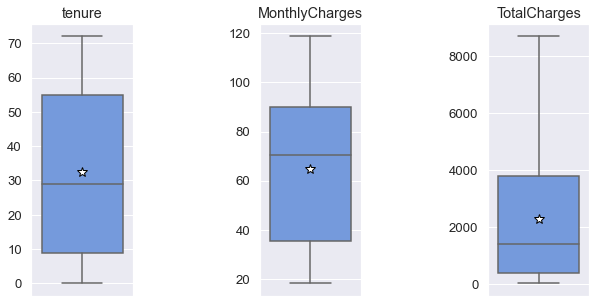

In [94]:
# Determine the number of columns to be plotted
num_inputs = len(list(tem_df.columns))

# Create a figure with 1 row, and num_inputs long
fig, axs = plt.subplots(1, num_inputs, figsize=(10,5))

# Use a for loop to loop over each column in the dataframe and 
# create a separate box plot
for i, (ax, curve) in enumerate(zip(axs.flat, list(tem_df.columns))):
    sns.boxplot(y=tem_df[curve], ax=ax, color='cornflowerblue', showmeans=True,  
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           flierprops={'marker':'o', 
                      'markerfacecolor':'darkgreen',
                      'markeredgecolor':'darkgreen'})
    
    ax.set_title(list(tem_df.columns)[i])
    ax.set_ylabel('')
    
plt.subplots_adjust(hspace=0.15, wspace=1.25)
plt.show()

#### Fromt the above box plot we conclude that there seems to be no outliers in the dataset.

### Separating the columns into features and target:

In [141]:
# importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, accuracy_score, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [96]:
# Let's split our dataset into independent (X) and dependent (y) variables
X = df.drop('Churn', axis = 1)
y = df.Churn

In [97]:
# checking which random state would be most suitable for train-test split
for i in range(0,100):
    X_train,X_test,y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=i)
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is:-  {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:-  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:-  0.2852135191303098
At random state 0, the testing accuracy is:-  0.24257400350132086


At random state 1, the training accuracy is:-  0.27238629825905725
At random state 1, the testing accuracy is:-  0.2813219491682267


At random state 2, the training accuracy is:-  0.28489884541556565
At random state 2, the testing accuracy is:-  0.24096546867921775


At random state 3, the training accuracy is:-  0.27133938865505225
At random state 3, the testing accuracy is:-  0.28492353794048664


At random state 4, the training accuracy is:-  0.28851990705688335
At random state 4, the testing accuracy is:-  0.23273703894737474


At random state 5, the training accuracy is:-  0.27639734387364434
At random state 5, the testing accuracy is:-  0.26876552184100055


At random state 6, the training accuracy is:-  0.28011747824293565
At random state 6, the testing accuracy is:-  0.25818095691315357


At random state 7, the training accuracy is:-  0.27201653

At random state 76, the training accuracy is:-  0.2697425466435922
At random state 76, the testing accuracy is:-  0.2896591827899171


At random state 77, the training accuracy is:-  0.27886115850950877
At random state 77, the testing accuracy is:-  0.26314967930209654


At random state 78, the training accuracy is:-  0.28154875588643047
At random state 78, the testing accuracy is:-  0.25472925909837296


At random state 79, the training accuracy is:-  0.2770916581172552
At random state 79, the testing accuracy is:-  0.267383860486167


At random state 80, the training accuracy is:-  0.268036275443042
At random state 80, the testing accuracy is:-  0.2937165497078653


At random state 81, the training accuracy is:-  0.28312056725109813
At random state 81, the testing accuracy is:-  0.2499338310035385


At random state 82, the training accuracy is:-  0.2741881311309232
At random state 82, the testing accuracy is:-  0.2768232862788488


At random state 83, the training accuracy is:-  0.26

In [98]:
# we use random state 13 since the train and test accuracy are the closest.
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=44)

In [99]:
# Let's standardize tenure, MonthlyCharges and TotalCharges
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [100]:
# checking the train set
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4338,1.0,1,0.0,0.0,0.069444,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.269058,0.022611
2111,1.0,0,1.0,1.0,0.416667,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,0.028401,0.079979
2952,0.0,0,1.0,1.0,0.361111,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.018435,0.054829
1687,1.0,0,1.0,1.0,0.166667,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.079721,0.034174
5212,1.0,0,1.0,1.0,1.000000,0.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.200299,0.316663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1.0,1,0.0,0.0,0.652778,1.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.410563,0.315624
1197,1.0,0,1.0,0.0,0.208333,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.010463,0.037162
2801,0.0,0,1.0,1.0,0.861111,1.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.873443,0.771371
3491,1.0,0,1.0,0.0,0.611111,1.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,0.523667,0.372911


In [101]:
# checking the test set
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5616,0.0,0,1.0,1.0,0.527778,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.359741,0.237393
2937,0.0,0,1.0,1.0,0.888889,1.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,2.0,0.741903,0.687970
1355,0.0,0,0.0,0.0,0.125000,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0.010962,0.018469
5441,0.0,0,1.0,0.0,0.972222,1.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,0.467364,0.547075
3333,1.0,0,0.0,1.0,0.166667,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.009467,0.022329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5748,0.0,0,0.0,0.0,0.291667,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,0.811659,0.227758
5172,1.0,0,0.0,0.0,0.750000,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,0.015944,0.130493
994,1.0,0,0.0,0.0,0.180556,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.015944,0.028808
6353,1.0,0,1.0,0.0,0.138889,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.364225,0.063472


In [102]:
# Dealing with imbalanced data 
y_train.value_counts()

0.0    3876
1.0    1406
Name: Churn, dtype: int64

In [103]:
# importing necessary library for oversampling
from imblearn.over_sampling import SMOTE

In [104]:
# oversampling using SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [105]:
# checking the data is balanced now
y_train.value_counts()

0.0    3876
1.0    3876
Name: Churn, dtype: int64

Now, both the classes have balanced.

In [142]:
# Write one function and call as many as times to check different performance parameters for different models
def metric_score(clf, X_train,X_test,y_train,y_test, train = True):
    
    if train:
        y_pred = clf.predict(X_train)
        roc_auc = roc_auc_score(y_train, y_pred)
        print("\n========================Train Result========================")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        print("ROC Area under Curve = {}".format(roc_auc))
    
    elif train == False:
        pred = clf.predict(X_test)
        roc_auc = roc_auc_score(y_test, pred)
        print("\n========================Test Result========================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("ROC Area under Curve = {}".format(roc_auc))
        print ('\n\nTest Classification Report\n', classification_report(y_test, pred, digits = 2))
        scores = cross_val_score(clf, X_test, pred, cv=10)
        print('Cross-Validation Accuracy Scores', scores)
        # plotting ROC_AUC curve
        RocCurveDisplay.from_predictions(y_test, pred)
        
        # plotting confusion matrix for the test set
        confusion_matrix_ = confusion_matrix(y_test, pred)
        plt.figure(figsize=(6,4))
        ax = plt.subplot()
        sns.heatmap(confusion_matrix_, annot=True, fmt='g', ax = ax, cmap = 'spring', linewidths = 0.1, linecolor = 'black', annot_kws={'fontsize': 20, 'color':'b', 'backgroundcolor': 'w'})
        plt.title('{} Confusion Matrix'.format(clf), fontsize=20)
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('Actual Label')
        plt.show()
    return roc_auc

### 1. Logistic Regression

In [107]:
# Running Logistic Regression
from sklearn.linear_model import LogisticRegression
logf = LogisticRegression()
logf.fit(X_train, y_train)

LogisticRegression()


========================Train Result========================
Accuracy Score: 77.45%
ROC Area under Curve = 0.7745098039215687

========================Test Result========================
Accuracy Score: 74.96%
ROC Area under Curve = 0.7669050574567284


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1298
         1.0       0.52      0.80      0.63       463

    accuracy                           0.75      1761
   macro avg       0.71      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



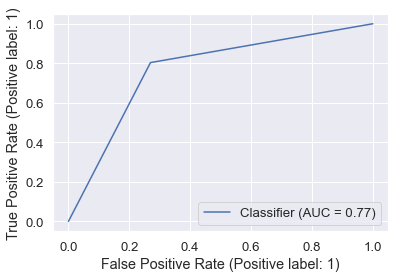

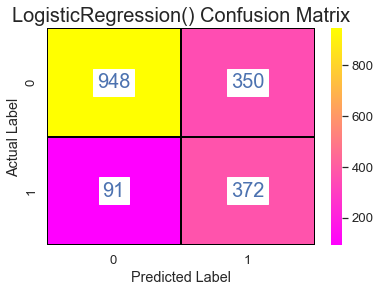

In [110]:
# Call the function and pass dataset to check train and test score
metric_score(logf,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_lr = metric_score(logf,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### 2. Decision Tree

In [111]:
# Running Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()


========================Train Result========================
Accuracy Score: 99.90%
ROC Area under Curve = 0.998968008255934

========================Test Result========================
Accuracy Score: 71.78%
ROC Area under Curve = 0.6654422653891849


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.78      0.80      1298
         1.0       0.47      0.56      0.51       463

    accuracy                           0.72      1761
   macro avg       0.65      0.67      0.66      1761
weighted avg       0.74      0.72      0.72      1761



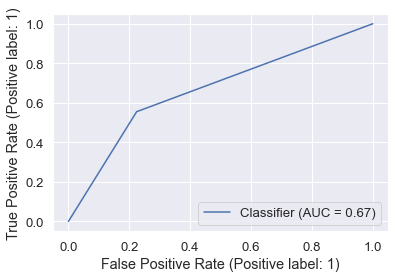

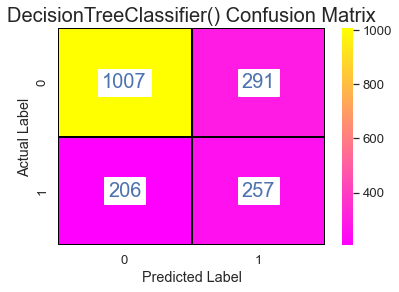

In [112]:
# Call the function and pass dataset to check train and test score
metric_score(dt,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_dt = metric_score(dt,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### 3. Random Forest

In [113]:
# Running Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()


========================Train Result========================
Accuracy Score: 99.90%
ROC Area under Curve = 0.998968008255934

========================Test Result========================
Accuracy Score: 77.68%
ROC Area under Curve = 0.7061986042657419


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1298
         1.0       0.58      0.56      0.57       463

    accuracy                           0.78      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.77      0.78      0.78      1761



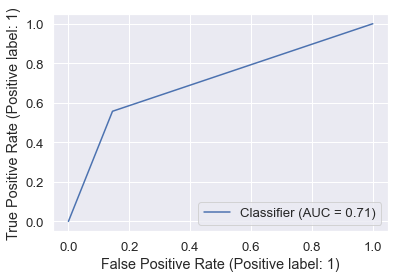

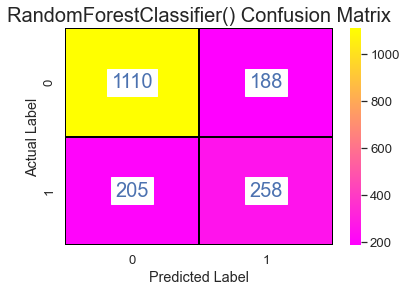

In [114]:
# Call the function and pass dataset to check train and test score
metric_score(rf,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_rf = metric_score(rf,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### 4. Ada Boost

In [115]:
#Running Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

AdaBoostClassifier()


========================Train Result========================
Accuracy Score: 82.59%
ROC Area under Curve = 0.8258513931888545

========================Test Result========================
Accuracy Score: 77.06%
ROC Area under Curve = 0.7526748245348385


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      1298
         1.0       0.55      0.71      0.62       463

    accuracy                           0.77      1761
   macro avg       0.72      0.75      0.73      1761
weighted avg       0.80      0.77      0.78      1761



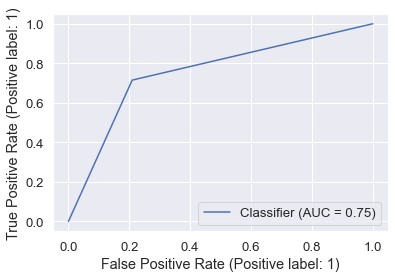

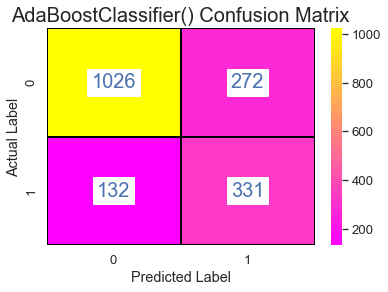

In [116]:
# Call the function and pass dataset to check train and test score
metric_score(ab,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_ab = metric_score(ab,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### 5. Gradient Boost

In [117]:
# Running Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()


========================Train Result========================
Accuracy Score: 85.96%
ROC Area under Curve = 0.8596491228070174

========================Test Result========================
Accuracy Score: 78.59%
ROC Area under Curve = 0.7484866233813776


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1298
         1.0       0.58      0.67      0.62       463

    accuracy                           0.79      1761
   macro avg       0.73      0.75      0.74      1761
weighted avg       0.80      0.79      0.79      1761



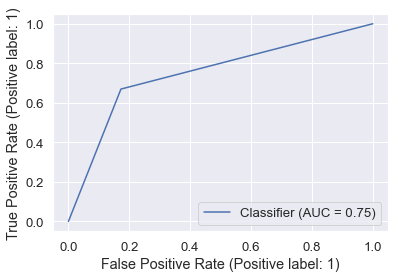

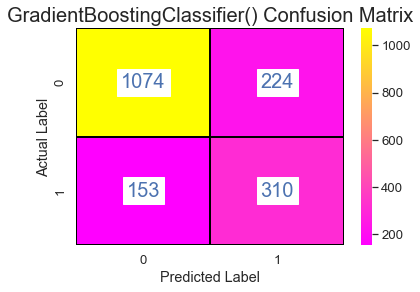

In [118]:
# Call the function and pass dataset to check train and test score
metric_score(gb,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_gb = metric_score(gb,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### 6. K-Nearest Neighbors

In [119]:
# Running K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()


========================Train Result========================
Accuracy Score: 85.84%
ROC Area under Curve = 0.8583591331269351

========================Test Result========================
Accuracy Score: 67.52%
ROC Area under Curve = 0.6844863504910362


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.66      0.75      1298
         1.0       0.43      0.70      0.53       463

    accuracy                           0.68      1761
   macro avg       0.65      0.68      0.64      1761
weighted avg       0.75      0.68      0.69      1761



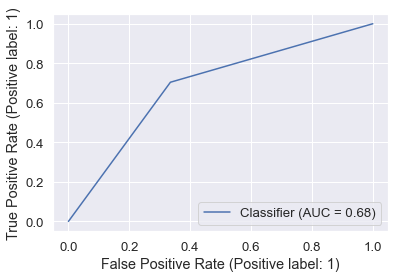

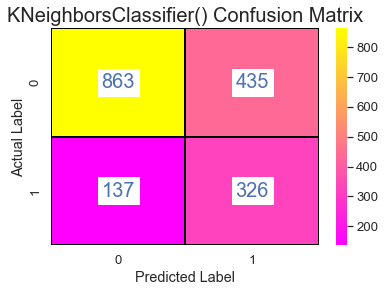

In [120]:
# Call the function and pass dataset to check train and test score
metric_score(knn,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_knn = metric_score(knn,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### 7. Support Vector Machine

In [121]:
# Running Support Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()


========================Train Result========================
Accuracy Score: 81.64%
ROC Area under Curve = 0.8164344685242518

========================Test Result========================
Accuracy Score: 74.11%
ROC Area under Curve = 0.7395910638397002


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.74      0.81      1298
         1.0       0.51      0.74      0.60       463

    accuracy                           0.74      1761
   macro avg       0.70      0.74      0.70      1761
weighted avg       0.79      0.74      0.75      1761



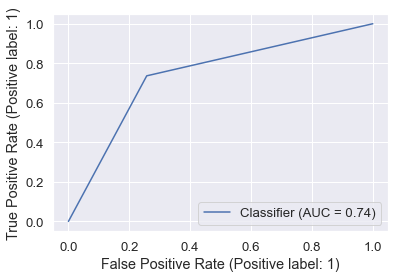

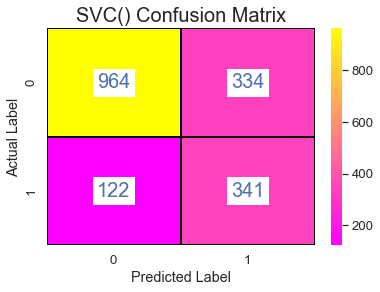

In [122]:
# Call the function and pass dataset to check train and test score
metric_score(svc,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_svc = metric_score(svc,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### Let's compare ROC AUC to choose best model

In [123]:
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_ab, roc_auc_gb, roc_auc_knn, roc_auc_svc]
model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','Ada Boost','Gradient Boost','K-nearest neighbor', 'Support Vector Machine'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)

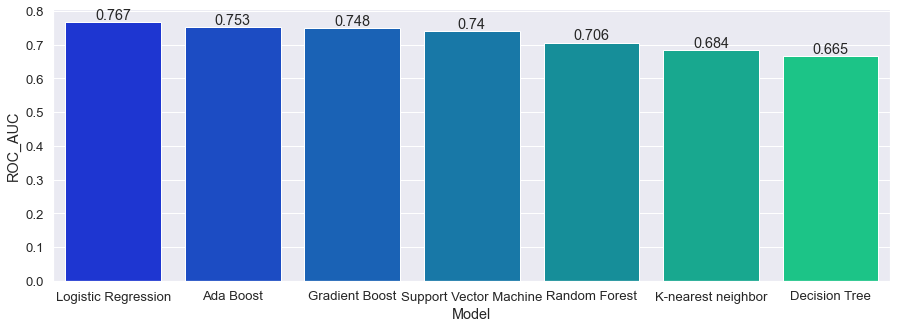

In [124]:
plt.figure(figsize=(15,5))
ax.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax.set_xlabel('Model', fontsize=18)
ax.set_ylabel('ROC_AUC', fontsize=18)
ax = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter', order=data.sort_values('ROC_AUC',ascending = False).Model)
ax.tick_params(axis='y')
for c in ax.containers:
    labels = [f'{round(float((v.get_height())),3)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

__Since the Logistic Regression, Ada Boost and Gradient Boost are the top 3 models based on AUC score without parameters tuning. Therefore, I am choosing them to work on them.__

## Hyperparameter Tuning

In [125]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

### 1. Logistic Regression

In [126]:
logf = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
# define grid search
grid = dict(solver=solvers,penalty=penalty)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logf, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844242 using {'penalty': 'l2', 'solver': 'newton-cg'}
0.844242 (0.014027) with: {'penalty': 'l2', 'solver': 'newton-cg'}
0.841007 (0.015086) with: {'penalty': 'l2', 'solver': 'lbfgs'}
0.842835 (0.014717) with: {'penalty': 'l2', 'solver': 'liblinear'}


In [130]:
# Running Logistic Regression with the best parameters
logf = LogisticRegression(penalty= 'l2', solver= 'newton-cg')
logf.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')


========================Train Result========================
Accuracy Score: 77.45%
ROC Area under Curve = 0.7745098039215687

========================Test Result========================
Accuracy Score: 74.96%
ROC Area under Curve = 0.7669050574567284


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1298
         1.0       0.52      0.80      0.63       463

    accuracy                           0.75      1761
   macro avg       0.71      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



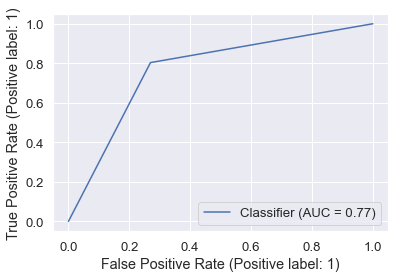

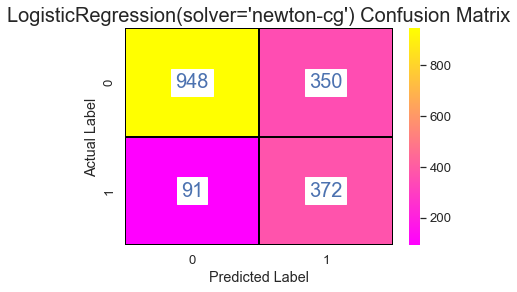

In [131]:
# Call the function and pass dataset to check train and test score
metric_score(logf,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_lr_new = metric_score(logf,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### 2. Ada Boost

In [132]:
ab = AdaBoostClassifier()
n_estimators = range(100, 1000, 100)
learning_rate = [0.05,0.1,1.0,0.15,0.2,1.5,2.0]

# define grid search
grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ab, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.848119 using {'learning_rate': 0.05, 'n_estimators': 500}
0.839792 (0.013179) with: {'learning_rate': 0.05, 'n_estimators': 100}
0.845365 (0.013276) with: {'learning_rate': 0.05, 'n_estimators': 200}
0.847260 (0.013138) with: {'learning_rate': 0.05, 'n_estimators': 300}
0.847745 (0.013176) with: {'learning_rate': 0.05, 'n_estimators': 400}
0.848119 (0.013135) with: {'learning_rate': 0.05, 'n_estimators': 500}
0.848118 (0.013161) with: {'learning_rate': 0.05, 'n_estimators': 600}
0.848096 (0.013110) with: {'learning_rate': 0.05, 'n_estimators': 700}
0.847918 (0.013197) with: {'learning_rate': 0.05, 'n_estimators': 800}
0.847774 (0.013255) with: {'learning_rate': 0.05, 'n_estimators': 900}
0.845403 (0.013313) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.847415 (0.013313) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.848066 (0.013176) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.847839 (0.013285) with: {'learning_rate': 0.1, 'n_estimators': 400}
0.847602 (0.013

In [133]:
# Running Ada Boost with tuned parameters
ab = AdaBoostClassifier(learning_rate= 0.05, n_estimators= 500)
ab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=500)


========================Train Result========================
Accuracy Score: 80.37%
ROC Area under Curve = 0.8036635706914343

========================Test Result========================
Accuracy Score: 75.75%
ROC Area under Curve = 0.7653509136834538


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      1298
         1.0       0.53      0.78      0.63       463

    accuracy                           0.76      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.76      0.77      1761



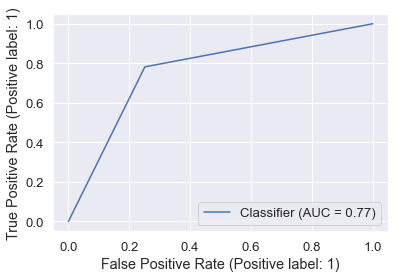

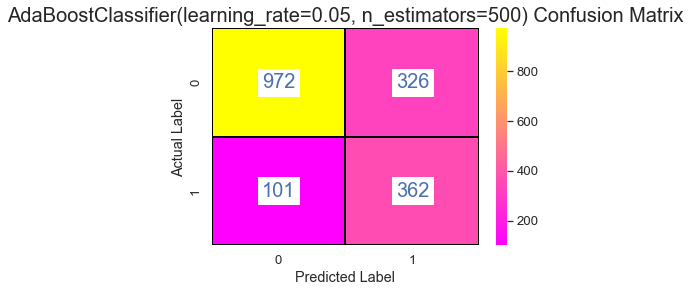

In [134]:
# Call the function and pass dataset to check train and test score
metric_score(ab,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_ab_new = metric_score(ab,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### 3. Gradient Boost

In [135]:
gb = GradientBoostingClassifier()
n_estimators = range(800, 1500, 100)
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=gb, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.848504 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800, 'subsample': 0.5}
0.839376 (0.013588) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 800, 'subsample': 0.5}
0.838214 (0.013324) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 800, 'subsample': 0.7}
0.835359 (0.013184) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 800, 'subsample': 1.0}
0.839931 (0.013528) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 900, 'subsample': 0.5}
0.838851 (0.013425) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 900, 'subsample': 0.7}
0.836134 (0.013195) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 900, 'subsample': 1.0}
0.840554 (0.013538) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.839560 (0.013434) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.837336 (0.013555) with: {'learning_rate': 0.001,

In [136]:
# Running Gradient Boosting
gb = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 800, subsample= 0.5)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=800, subsample=0.5)


========================Train Result========================
Accuracy Score: 85.36%
ROC Area under Curve = 0.8535861713106296

========================Test Result========================
Accuracy Score: 78.36%
ROC Area under Curve = 0.7490299081158254


Test Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1298
         1.0       0.58      0.68      0.62       463

    accuracy                           0.78      1761
   macro avg       0.73      0.75      0.74      1761
weighted avg       0.80      0.78      0.79      1761

Cross-Validation Accuracy Scores [0.94915254 0.96590909 0.95454545 0.94886364 0.95454545 0.98863636
 0.97727273 0.98295455 0.98863636 0.94318182]


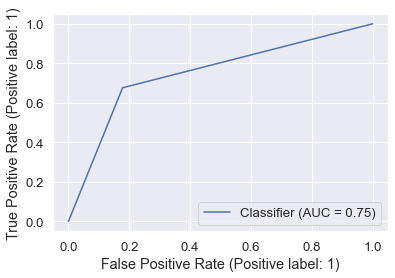

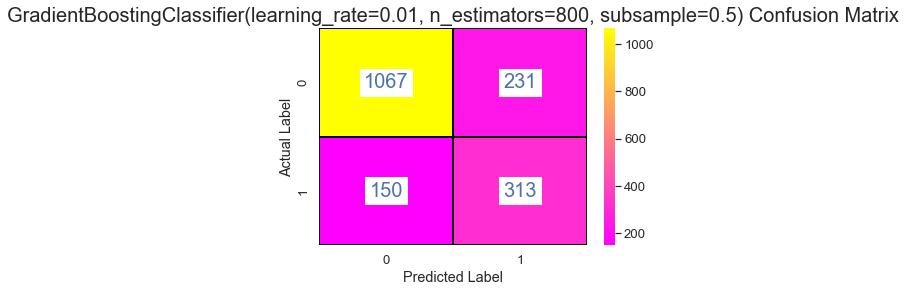

In [143]:
# Call the function and pass dataset to check train and test score
metric_score(gb,X_train,X_test,y_train,y_test, train = True)   # This is for training score

roc_auc_gb_new = metric_score(gb,X_train,X_test,y_train,y_test, train = False)  # This is for testing score

### Let's compare ROC AUC for tuned models to choose best model

In [139]:
roc_auc_scores = [roc_auc_lr_new, roc_auc_ab_new, roc_auc_gb_new]
model_data = {'Model': ['Logistic Regression', 'Ada Boost','Gradient Boost'],
              'ROC_AUC': roc_auc_scores}
data_new = pd.DataFrame(model_data)

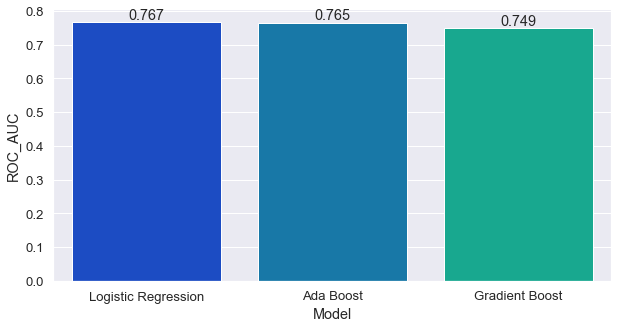

In [140]:
plt.figure(figsize=(10,5))
ax.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax.set_xlabel('Model', fontsize=18)
ax.set_ylabel('ROC_AUC', fontsize=18)
ax = sns.barplot(x='Model', y='ROC_AUC', data = data_new, palette='winter', order=data.sort_values('ROC_AUC',ascending = False).Model)
ax.tick_params(axis='y')
for c in ax.containers:
    labels = [f'{round(float((v.get_height())),3)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

#### Since the scores did not improve much therefore, using the model without any hyper tuning.

From the above model, Logistic Regression seems to be performing well based on accuracy and recall.

In [144]:
# saving the model
import pickle
filename = 'telecom_churn.pkl'
pickle.dump(rf, open(filename, 'wb'))